In [57]:
from matplotlib import pyplot as plt, font_manager
import numpy as np
import math

# 한글 폰트 사용하기 위해 설정
# 윈도 10에 있는 기본 폰트 파일을 사용하도록 설정하기

import matplotlib.font_manager as fm
import matplotlib

matplotlib.rc('font', family = "Malgun Gothic")

In [58]:
np.random.seed(0)
hong = np.ceil(np.random.rand(12) * 100)
kang = np.ceil(np.random.rand(12) * 100)
date = np.arange(1, 13)

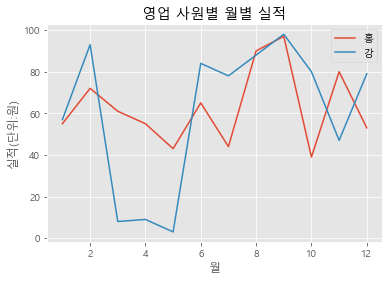

In [59]:
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(date, hong, label = '홍')
ax.plot(date, kang, label = '강')

ax.set_title('영업 사원별 월별 실적')
ax.set_ylabel('실적(단위:원)')
ax.set_xlabel('월')
ax.legend()
plt.show()

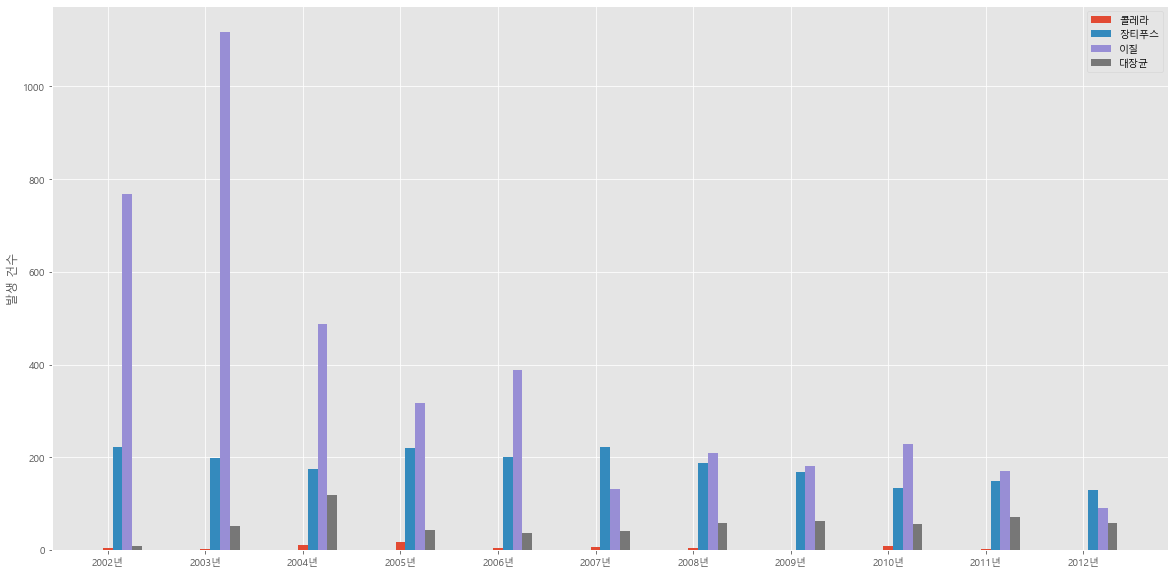

In [64]:
# 막대 그래프
import pandas as pd

df = pd.read_csv('1군전염병발병현황_년도별_2.csv', 
                 encoding = 'euc-kr', index_col = '년도')
df.head(10)

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)

wt = np.array(range(len(df)))
w = 0.1

for i in df.columns:
    ax.bar(wt, df[i],width = w, label = i)
    wt = wt + w

ax.set_xticks(np.array(range(len(df))))
ax.set_xticklabels(df.index)
ax.set_ylabel('발생 건수')
ax.legend()
plt.show()

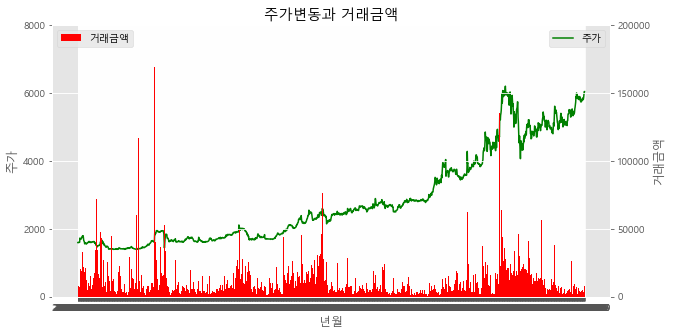

In [71]:
# 라인차트, 막대차트 함께 사용
s_df = pd.read_csv('주가변동.csv', encoding = 'euc-kr', index_col = 0)
s_df.head()

# 첫번째 라인 차트 그리기- 종가 기준 변화량 그리기
fig = plt.figure(figsize = (10, 5))
s_ax_1 = fig.add_subplot(111)
plt.style.use('ggplot')

s_ax_1.plot(s_df.index, s_df['종가'], color = 'g', label = '주가')

# 1개의 X축에 2개의 Y 축 설정하기 .twinx()
s_ax_2 = s_ax_1.twinx()
s_ax_2.bar(s_df.index, s_df['거래금액'], color = 'r', label = '거래금액', width = 2)

# 축과 레이블 값 지정
s_ax_1.set_yticks([i * 2000 for i in range(5)])
s_ax_1.set_ylabel('주가')
s_ax_1.set_xlabel('년월')

s_ax_2.set_yticks([i * 50000 for i in range(5)])
s_ax_2.set_ylabel('거래금액')

s_ax_1.set_title('주가변동과 거래금액')

s_ax_1.legend(loc = 1)
s_ax_2.legend(loc = 2)

plt.show()

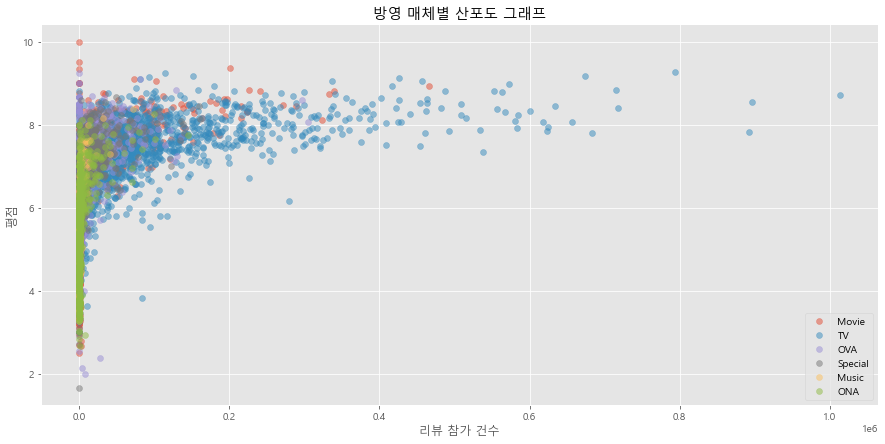

In [77]:
# 산포도 그래프 활용하기
# 주요 영화 평점을 산포도 그래프로 작성하여 평점 패턴 찾기

import pandas as pd

df = pd.read_csv('ani_info.csv', encoding = 'euc-kr', index_col = 'anime_id')
df.head()

# vote_no가 80만번 이상인 작품만 골라내기
df.loc[df['vote_no'] >= 800000, ['name', 'vote_no']]
# vote_no가 60만개 이상이면서 평점이 8 이상인 작품 골라내기
df.loc[(df['vote_no'] >= 600000) & (df['rating'] >= 8), ['name', 'rating']]

# 장르별 추출
types = df['type'].unique()
types

fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot(111)

for t in types:
    x = df.loc[df['type'] == t, 'vote_no']
    y = df.loc[df['type'] == t, 'rating']
    
    ax.scatter(x,y,alpha = 0.5, label = t)

ax.set_title('방영 매체별 산포도 그래프')
ax.set_xlabel('리뷰 참가 건수')
ax.set_ylabel('평점')

ax.legend(loc = 'lower right', fontsize = 10)
plt.show()

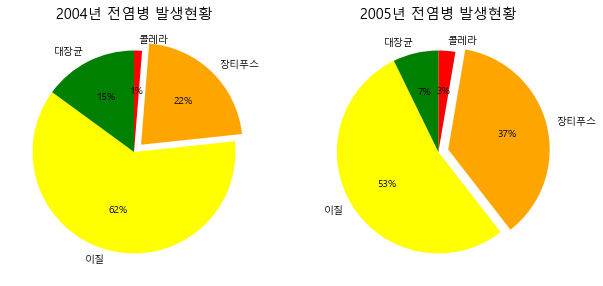

In [86]:
# pie chart
import pandas as p

c_df = pd.read_csv('1군전염병발병현황_년도별_2.csv', 
                 encoding = 'euc-kr', index_col = '년도')
c_df.head()

c_df_2004 = c_df.iloc[2]
c_df_2005 = c_df.iloc[3]

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

color = ('red', 'orange', 'yellow', 'green')

ax1.pie(c_df_2004,
       explode = (0,0.1,0,0),
       labels = c_df_2004.index,
        autopct = '%1.0f%%',
        colors = color,
        startangle = 90, counterclock = False)

ax2.pie(c_df_2005,
       explode = (0,0.1,0,0),
       labels = c_df_2005.index,
       autopct = '%1.0f%%',
       colors = color,
       startangle = 90, counterclock = False)

ax1.set_title('2004년 전염병 발생현황')
ax2.set_title('2005년 전염병 발생현황')

fig.subplots_adjust(wspace = 0.2)
plt.show()